# Dunkin - Keyword Research

Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

# to display all columns
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 400


## Data wrangling

Dunkin dataset consisting of 10,000 keywords.

In [2]:
df = pd.read_csv("./data/raw/dunkin.csv")
df.head()

,Keyword,Position,Previous position,Search Volume,Keyword Difficulty,CPC,URL,Traffic,Traffic (%),Traffic Cost,Competition,Number of Results,Trends,Timestamp,SERP Features by Keyword
0,dunkin donuts,1,1,2740000,88.99,2.24,https://www.dunkindonuts.com/,2192000,37.27,4910080,0.09,35000000,"[55,45,45,45,45,55,45,45,55,55,82,100]",8/30/2020,"Knowledge panel, Top stories, Image pack, Twee..."
1,dunkin donuts near me,1,1,823000,83.58,2.32,https://www.dunkindonuts.com/en/locations,658400,11.19,1527488,0.01,85,"[100,100,100,82,82,82,82,67,67,67,82,100]",8/30/2020,"Local pack, Image pack, Site links, People als..."
2,dunkin donuts menu,1,1,550000,86.33,1.78,https://www.dunkindonuts.com/en/menu,440000,7.48,783200,0.02,30200000,"[55,55,55,67,67,55,55,55,55,67,82,100]",8/30/2020,"Image pack, Video, FAQ"
3,donuts,1,1,823000,81.85,1.54,https://www.dunkindonuts.com/,386810,6.57,595687,0.04,321000000,"[82,82,82,82,82,67,82,82,67,67,82,100]",8/30/2020,"Local pack, Top stories, Image pack, Site link..."
4,dd,1,1,301000,84.47,2.53,https://www.dunkindonuts.com/,240800,4.09,609224,0.02,871000000,"[67,67,55,55,55,67,55,55,67,67,100,82]",8/30/2020,"Knowledge panel, Video Carousel, People also ask"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Keyword                   10000 non-null  object 
 1   Position                  10000 non-null  int64  
 2   Previous position         10000 non-null  int64  
 3   Search Volume             10000 non-null  int64  
 4   Keyword Difficulty        10000 non-null  float64
 5   CPC                       10000 non-null  float64
 6   URL                       10000 non-null  object 
 7   Traffic                   10000 non-null  int64  
 8   Traffic (%)               10000 non-null  float64
 9   Traffic Cost              10000 non-null  int64  
 10  Competition               10000 non-null  float64
 11  Number of Results         10000 non-null  int64  
 12  Trends                    10000 non-null  object 
 13  Timestamp                 10000 non-null  object 
 14  SERP Fe

In [4]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format = '%m/%d/%Y').dt.date
df.head()

,Keyword,Position,Previous position,Search Volume,Keyword Difficulty,CPC,URL,Traffic,Traffic (%),Traffic Cost,Competition,Number of Results,Trends,Timestamp,SERP Features by Keyword
0,dunkin donuts,1,1,2740000,88.99,2.24,https://www.dunkindonuts.com/,2192000,37.27,4910080,0.09,35000000,"[55,45,45,45,45,55,45,45,55,55,82,100]",2020-08-30,"Knowledge panel, Top stories, Image pack, Twee..."
1,dunkin donuts near me,1,1,823000,83.58,2.32,https://www.dunkindonuts.com/en/locations,658400,11.19,1527488,0.01,85,"[100,100,100,82,82,82,82,67,67,67,82,100]",2020-08-30,"Local pack, Image pack, Site links, People als..."
2,dunkin donuts menu,1,1,550000,86.33,1.78,https://www.dunkindonuts.com/en/menu,440000,7.48,783200,0.02,30200000,"[55,55,55,67,67,55,55,55,55,67,82,100]",2020-08-30,"Image pack, Video, FAQ"
3,donuts,1,1,823000,81.85,1.54,https://www.dunkindonuts.com/,386810,6.57,595687,0.04,321000000,"[82,82,82,82,82,67,82,82,67,67,82,100]",2020-08-30,"Local pack, Top stories, Image pack, Site link..."
4,dd,1,1,301000,84.47,2.53,https://www.dunkindonuts.com/,240800,4.09,609224,0.02,871000000,"[67,67,55,55,55,67,55,55,67,67,100,82]",2020-08-30,"Knowledge panel, Video Carousel, People also ask"


In [5]:
df.columns

Index(['Keyword', 'Position', 'Previous position', 'Search Volume',
       'Keyword Difficulty', 'CPC', 'URL', 'Traffic', 'Traffic (%)',
       'Traffic Cost', 'Competition', 'Number of Results', 'Trends',
       'Timestamp', 'SERP Features by Keyword'],
      dtype='object')

,Position,Previous position,Search Volume,Keyword Difficulty,CPC,Traffic,Traffic (%),Traffic Cost,Competition,Number of Results
Position,1.000000,0.963997,-0.043925,-0.220927,-0.035872,-0.034214,-0.033309,-0.031126,0.047235,0.050249
Previous position,0.963997,1.000000,-0.045341,-0.211380,-0.035431,-0.033097,-0.032223,-0.030123,0.048102,0.039650
Search Volume,-0.043925,-0.045341,1.000000,0.031223,0.018883,0.565000,0.564781,0.561016,-0.004665,0.016296
Keyword Difficulty,-0.220927,-0.211380,0.031223,1.000000,0.032719,0.016763,0.016500,0.016223,-0.013119,0.040479
CPC,-0.035872,-0.035431,0.018883,0.032719,1.000000,0.008419,0.008303,0.009132,0.081129,0.008889
Traffic,-0.034214,-0.033097,0.565000,0.016763,0.008419,1.000000,0.999996,0.996913,-0.005657,-0.003637
Traffic (%),-0.033309,-0.032223,0.564781,0.016500,0.008303,0.999996,1.000000,0.996932,-0.005579,-0.003521
Traffic Cost,-0.031126,-0.030123,0.561016,0.016223,0.009132,0.996913,0.996932,1.000000,-0.004442,-0.003174
Competition,0.047235,0.048102,-0.004665,-0.013119,0.081129,-0.005657,-0.005579,-0.004442,1.000000,0.000540
Number of Results,0.050249,0.039650,0.016296,0.040479,0.008889,-0.003637,-0.003521,-0.003174,0.000540,1.000000


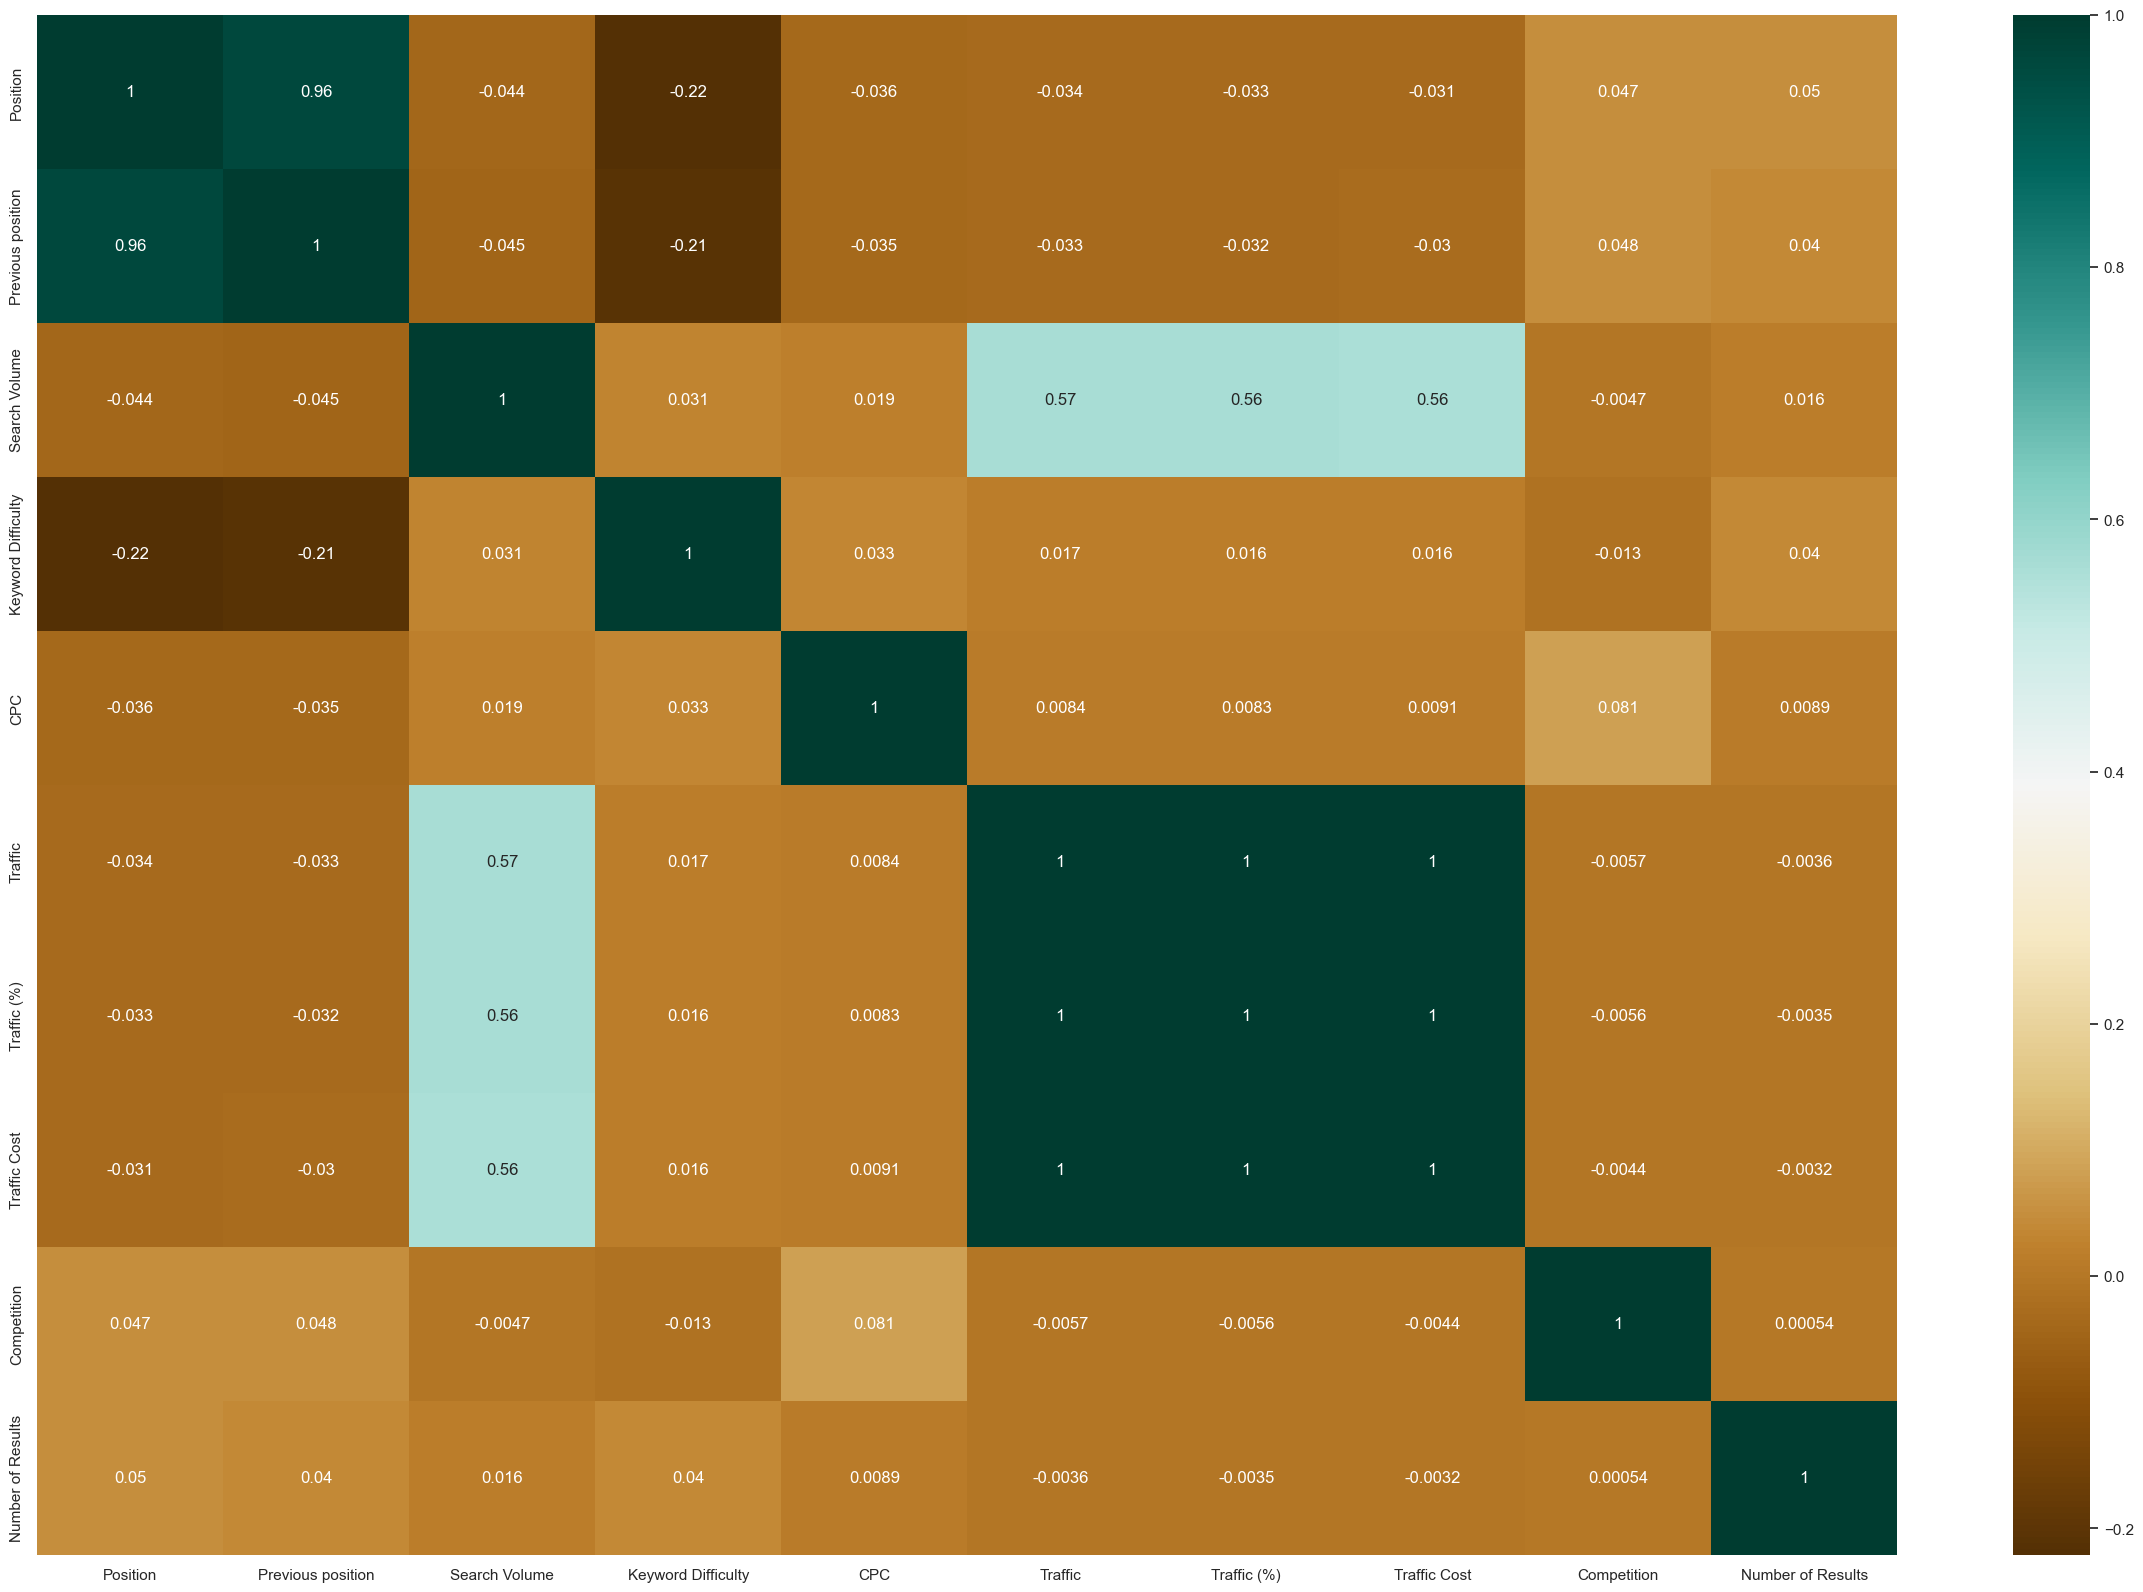

In [6]:
plt.figure(figsize=(30,20))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [7]:
df.drop(['Traffic (%)', 'Traffic Cost'], axis = 1, inplace=True)
df.head()

,Keyword,Position,Previous position,Search Volume,Keyword Difficulty,CPC,URL,Traffic,Competition,Number of Results,Trends,Timestamp,SERP Features by Keyword
0,dunkin donuts,1,1,2740000,88.99,2.24,https://www.dunkindonuts.com/,2192000,0.09,35000000,"[55,45,45,45,45,55,45,45,55,55,82,100]",2020-08-30,"Knowledge panel, Top stories, Image pack, Twee..."
1,dunkin donuts near me,1,1,823000,83.58,2.32,https://www.dunkindonuts.com/en/locations,658400,0.01,85,"[100,100,100,82,82,82,82,67,67,67,82,100]",2020-08-30,"Local pack, Image pack, Site links, People als..."
2,dunkin donuts menu,1,1,550000,86.33,1.78,https://www.dunkindonuts.com/en/menu,440000,0.02,30200000,"[55,55,55,67,67,55,55,55,55,67,82,100]",2020-08-30,"Image pack, Video, FAQ"
3,donuts,1,1,823000,81.85,1.54,https://www.dunkindonuts.com/,386810,0.04,321000000,"[82,82,82,82,82,67,82,82,67,67,82,100]",2020-08-30,"Local pack, Top stories, Image pack, Site link..."
4,dd,1,1,301000,84.47,2.53,https://www.dunkindonuts.com/,240800,0.02,871000000,"[67,67,55,55,55,67,55,55,67,67,100,82]",2020-08-30,"Knowledge panel, Video Carousel, People also ask"


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Position,10000.0,5.187130e+01,3.297794e+01,1.00,20.0000,59.000,81.00,1.000000e+02
Previous position,10000.0,5.082950e+01,3.340215e+01,0.00,17.0000,57.000,81.00,1.000000e+02
Search Volume,10000.0,2.356532e+03,5.430127e+04,20.00,30.0000,50.000,140.00,2.740000e+06
Keyword Difficulty,10000.0,8.089932e+01,7.046178e+00,31.91,77.2175,82.165,85.86,9.993000e+01
CPC,10000.0,5.497260e-01,3.874393e+00,0.00,0.0000,0.000,0.00,3.356900e+02
Traffic,10000.0,5.308406e+02,2.386606e+04,0.00,0.0000,0.000,0.00,2.192000e+06
Competition,10000.0,1.378440e-01,2.698258e-01,0.00,0.0000,0.010,0.11,1.000000e+00
Number of Results,10000.0,3.259758e+08,1.429064e+09,0.00,91.0000,1465000.000,31300000.00,2.527000e+10


# Searching for important insights

I'm creating an auxiliar DF **df_keywords**which holds the most important keywords in terms of positions.

## Non-searchable prev position

Non-searchable prev position whose position is at least 30.

In [9]:
df[(df['Previous position'] == 0)].shape

(170, 13)

In [10]:
#df[(df['Previous position'] == 0)].sort_values(by=['Position'])

In [11]:
df_keywords = df[ (df['Previous position'] == 0) & (df['Position']<=30)]

## Prev position better than actual position

Previous position at least 30 and better than the actual position.

In [12]:
df[(df['Previous position'] != 0) & (df['Previous position'] < df['Position'])].shape

(98, 13)

In [13]:
#df[(df['Previous position'] != 0) & (df['Previous position'] < df['Position'])].sort_values(by=['Previous position', 'Position'])

In [14]:
df_keywords = pd.concat([df_keywords, df[(df['Previous position'] != 0) & (df['Previous position'] < df['Position']) & (df['Previous position'] < 30)]], ignore_index=True)

## Actual position better than previous position

Actual position at least 20 and better than previous position.

In [15]:
df[(df['Previous position'] != 0) & (df['Previous position'] > df['Position'])].shape

(90, 13)

In [16]:
# df[(df['Previous position'] != 0) & (df['Previous position'] > df['Position'])].sort_values(by = ['Position', 'Previous position'])

In [17]:
df_keywords = pd.concat([df_keywords, df[(df['Previous position'] != 0) & (df['Previous position'] > df['Position']) & (df['Position'] <= 20)]], ignore_index=True)

### containing *dunkin* as keyword

dfaux = df[df['Keyword'].str.contains('dunkin')].copy()
dfaux[dfaux['Previous position'] > dfaux['Position']]

## Same position as before

Same position as before, at least in position 30.

In [18]:
df[(df['Previous position'] != 0) & (df['Previous position'] == df['Position'])].shape

(9642, 13)

In [19]:
# df[(df['Previous position'] != 0) & (df['Previous position'] == df['Position']) & (df['Position']< 30)].sort_values(by = ['Position', 'Competition'])

In [20]:
df_keywords = pd.concat([df_keywords, df[(df['Previous position'] != 0) & (df['Previous position'] == df['Position']) & (df['Position']< 30)]], ignore_index=True)

## High traffic low difficulty??

Do keywords with rank >30 should make sense? Should we review them?

In [21]:
# df[ (df['Search Volume'] > 1000) & (df['Position']<20) & (df['Competition']<0.4) ].sort_values(['Search Volume', 'Competition'])

In [22]:
# df_keywords = pd.concat([keyword_df, df[ (df['Search Volume'] > 1000) & (df['Position']<20) & (df['Competition']<0.4) ]], ignore_index=True)

## Should we add top 200 Highest volume?

I calculated the top 200 highest volumes in df and computed which of those are not in keyword_df.
None of they appear to add significative value. <br> I.e. the ones that matter are already there.

In [23]:
#df_keywordaux = df.sort_values(by=['Search Volume'], ascending=False).head(200).copy()
#df_keywordaux200 = df.sort_values(by=['Search Volume'], ascending=False).head(200).copy()

In [24]:
#df_keywordaux = pd.concat([keyword_df, df_keywordaux])
#df_keywordaux[df_keywordaux.duplicated()]

In [25]:
# Computes the subtraction
#df_keywordaux200[~df_keywordaux200.apply(tuple,1).isin(df_keywordaux[df_keywordaux.duplicated()].apply(tuple,1))]

# Divide in *Dunkin* and *Not-dunkin* keywords

In [26]:
df_dunkin = df_keywords[df_keywords['Keyword'].str.contains('dunkin|dd')]
df_nondunkin = df_keywords[~df_keywords['Keyword'].str.contains('dunkin|dd')]

In [27]:
df_dunkin.shape, df_nondunkin.shape

((2105, 13), (896, 13))

# Visualization

- Points over the line: improvement in position.
- Points on the line: same position.
- Points under the line: worse position than before.
- Points on the x axis: didn't rank before, but now they do.

Text(0, 0.5, 'Prev Position')

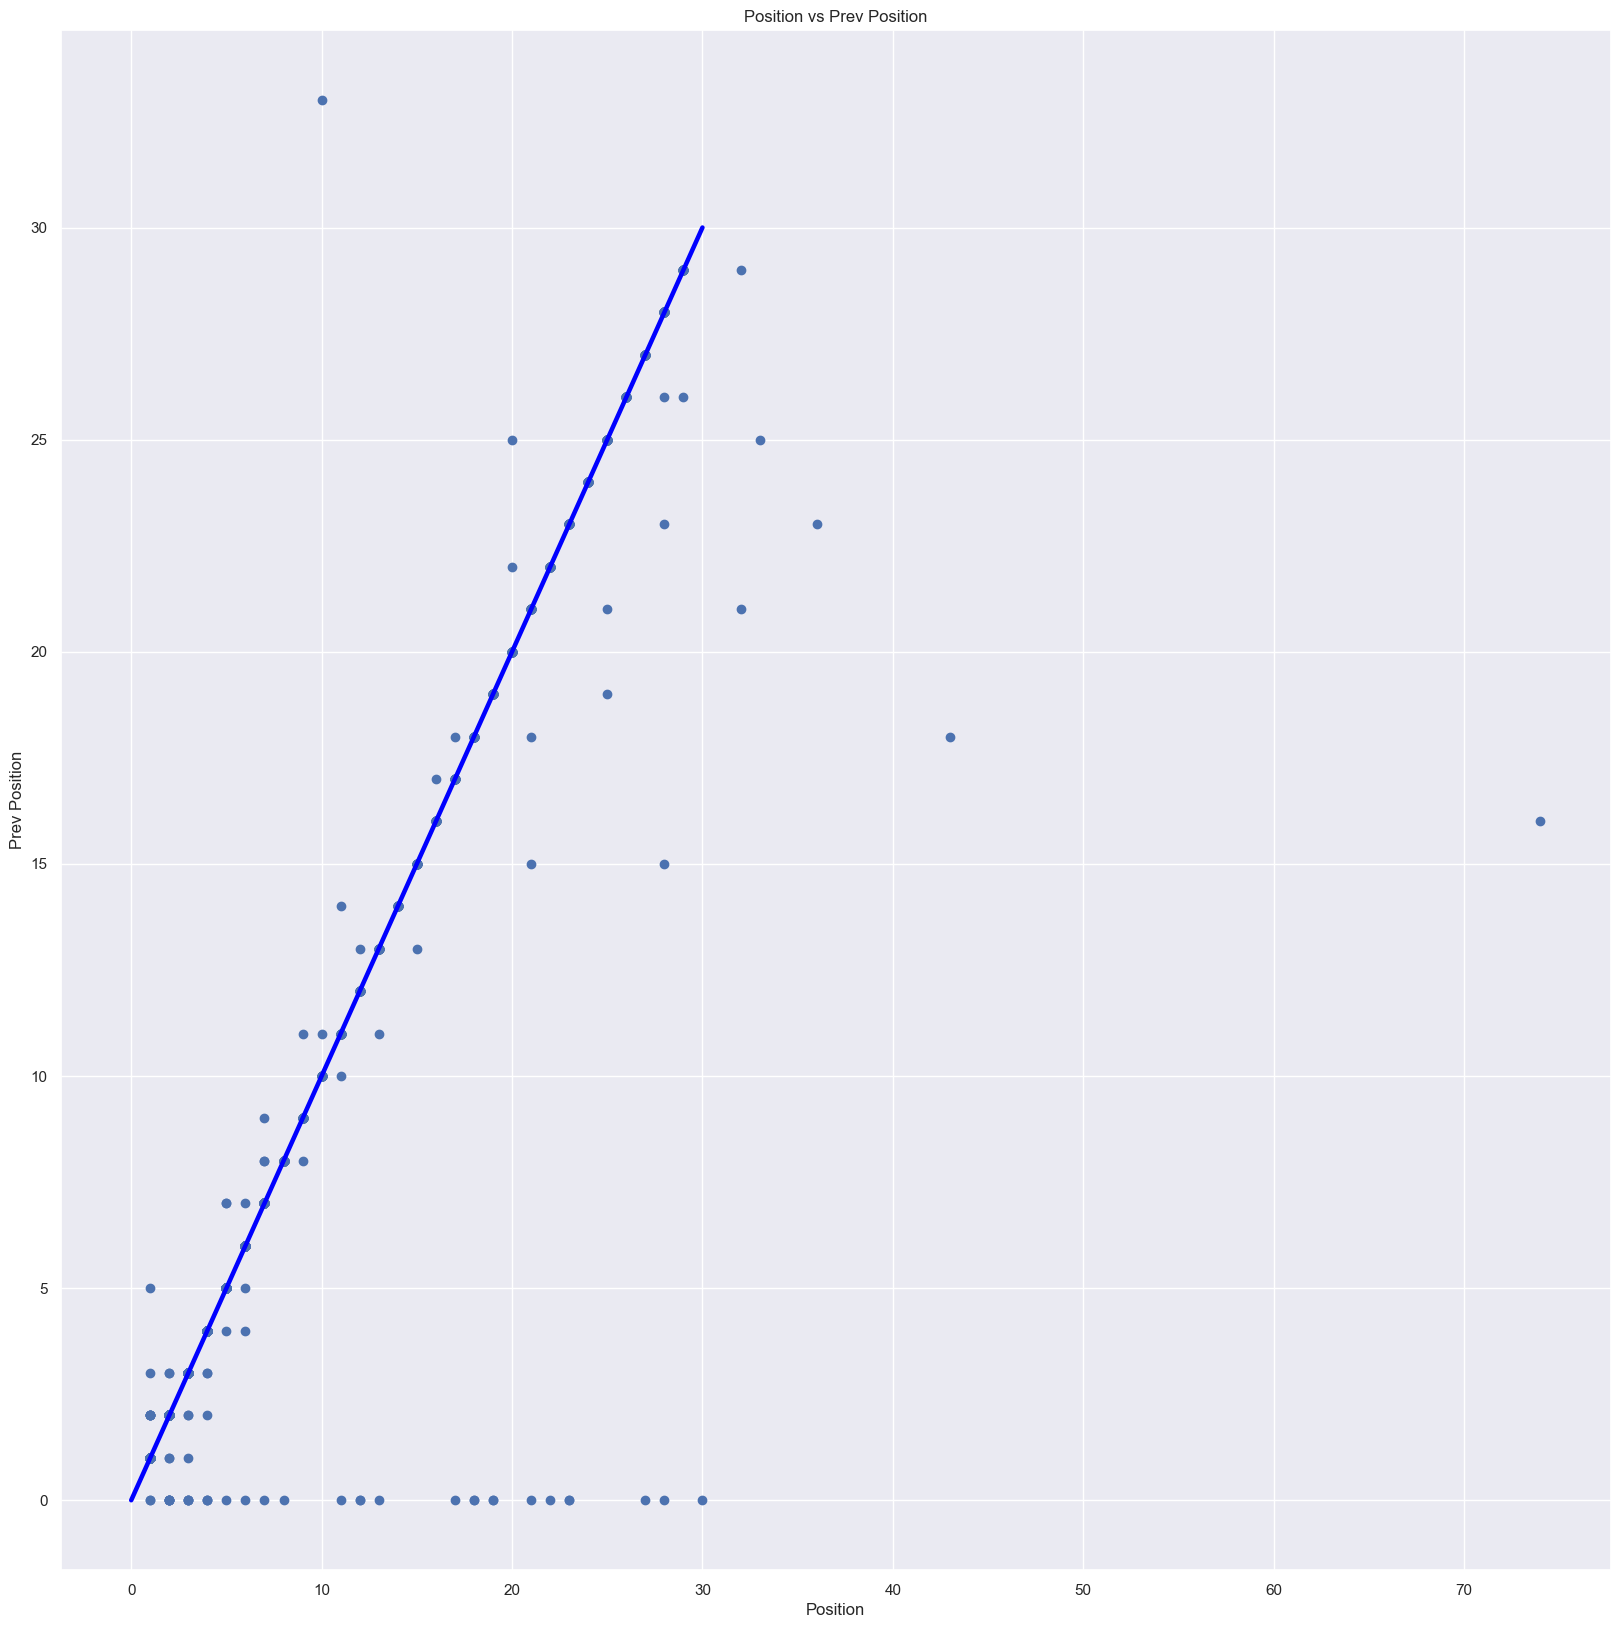

In [28]:
x = np.linspace(0,30,1000)

fig, ax = plt.subplots(figsize = (20, 20))
ax.plot(x, x, color="blue", linewidth=3.25)
ax.scatter(df_keywords['Position'], df_keywords['Previous position'])
ax.set_title('Position vs Prev Position')
ax.set_xlabel('Position')
ax.set_ylabel('Prev Position')
#ax.set_xlim([0, 80])
#ax.set_ylim([0, 80])

# API

In [29]:
import requests
from serpapi import GoogleSearch
import urllib
import urllib.parse
import json
from urllib.parse import (parse_qsl, urlsplit)
from requests_html import HTML
from requests_html import HTMLSession

## Interest over time - Pytrends

In [30]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360, timeout=(5,15))

In [31]:
kw = ['coffee', 'donuts', 'cinnamon roll']

In [32]:
dataset = []

for x in range(0,len(kw)):
     keywords = [kw[x]]
     pytrends.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='2018-01-01 2023-01-30',
     geo='US')
     data = pytrends.interest_over_time()
     if not data.empty:
          data = data.drop(labels=['isPartial'],axis='columns')
          dataset.append(data)

In [33]:
result = pd.concat(dataset, axis=1)
result.head()

,coffee,donuts,cinnamon roll
date,,,
2018-01-07,67,51,22
2018-01-14,66,53,24
2018-01-21,66,52,19
2018-01-28,66,55,19
2018-02-04,64,56,17


In [34]:
result.mean(axis = 0)

coffee           75.988679
donuts           65.815094
cinnamon roll    23.554717
dtype: float64

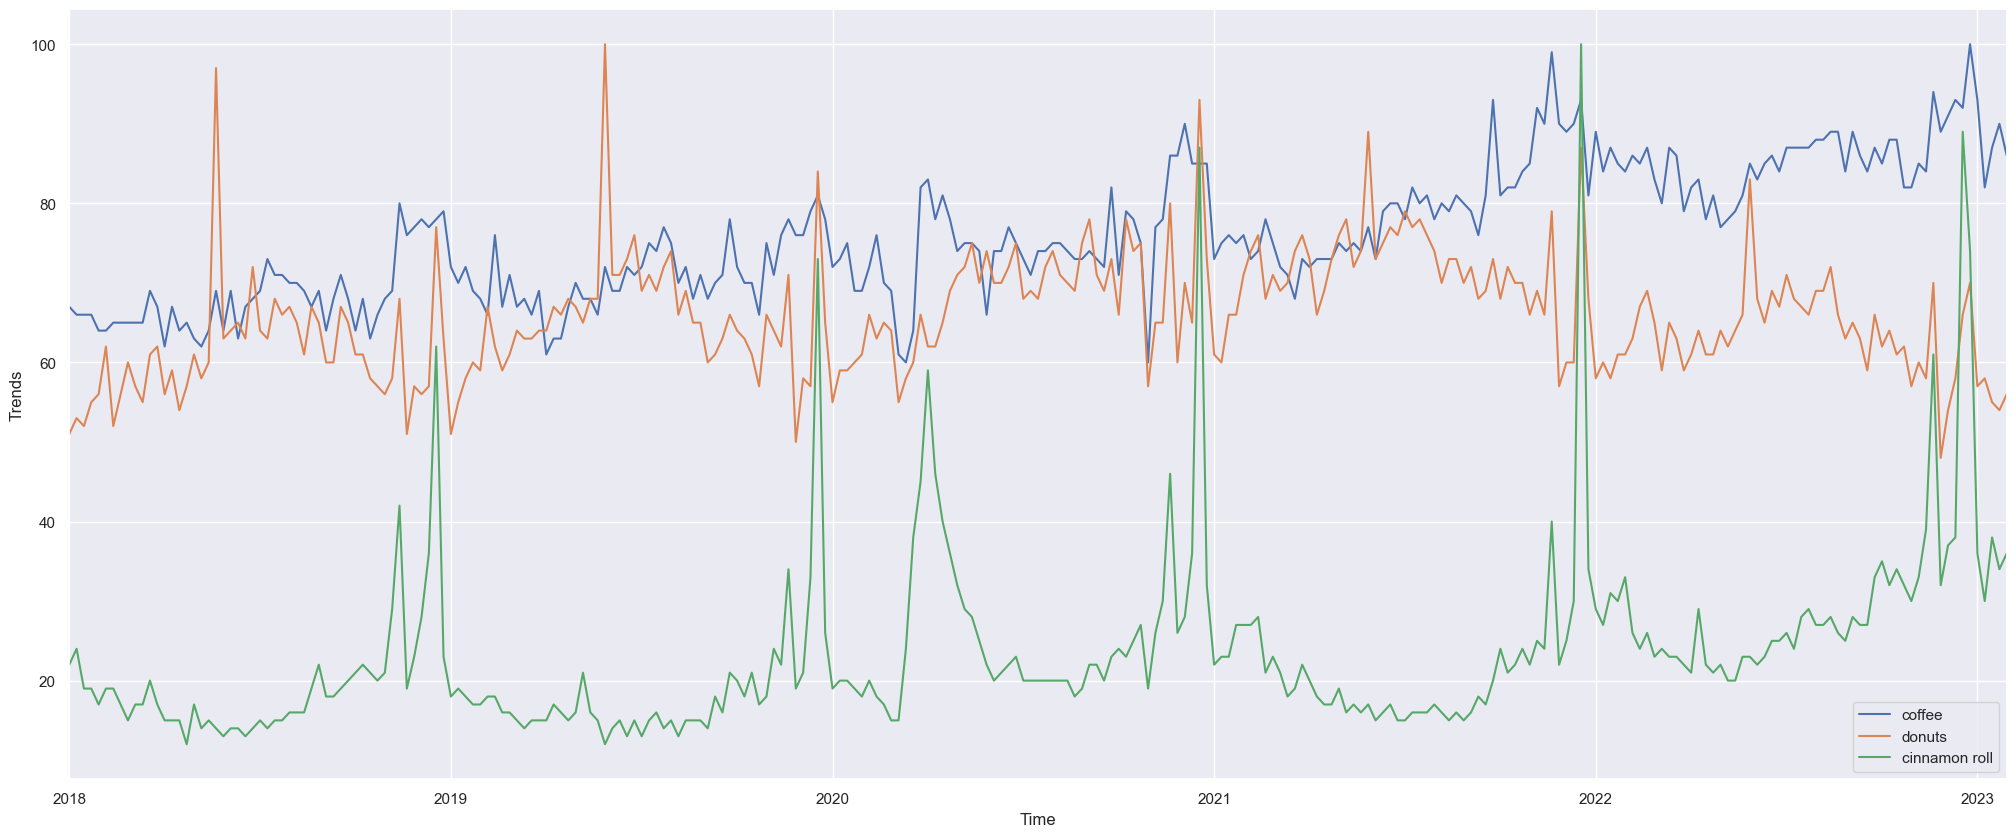

In [35]:
fig = result.plot(xlabel = 'Time', ylabel = 'Trends', figsize = (25, 10), kind = 'line')
fig.figure.savefig('timeline.png')

## Related entities - Pytrends

In [36]:
keywords = pytrends.suggestions('coffee')
df_kwsuggestions = pd.DataFrame(keywords)
cols = ['mid', 'Entity', 'Meaning']
df_kwsuggestions.columns = cols
df_kwsuggestions = df_kwsuggestions.drop("mid",axis=1)
df_kwsuggestions

,Entity,Meaning
0,Coffee,Drink
1,Coffee table,Topic
2,Coffeemaker,Topic
3,Anagram Solver,Book by Bloomsbury Publishing
4,French press,Topic


## Related queries - Google Autosuggest

Establish a connection to Autosuggest via requests and urllib_parse.

In [37]:
def get_source(url):

    try:
        session = HTMLSession()
        response = session.get(url)
        return response
    except requests.exceptions.RequestException as e:
        print(e)

def get_results(query):
    query = urllib.parse.quote_plus(query)
    response = get_source("https://suggestqueries.google.com/complete/search?output=chrome&hl=en&q=" + query)
    results = json.loads(response.text)
    return results

In [38]:
#Search term
lang_code = "en-gb" 
search_term = "coffee" 
results = get_results(search_term)
results

['coffee',
 ['coffee near me',
  'coffee shop',
  'coffee shops near me',
  'coffee mate',
  'coffee tree cinepolis',
  'coffee break',
  'coffeezilla',
  'coffee maker'],
 ['', '', '', '', '', '', '', ''],
 [],
 {'google:clientdata': {'bpc': False, 'tlw': False},
  'google:suggestrelevance': [1100, 601, 600, 554, 553, 552, 551, 550],
  'google:suggestsubtypes': [[512],
   [512],
   [512],
   [512],
   [512],
   [512],
   [512],
   [512]],
  'google:suggesttype': ['QUERY',
   'QUERY',
   'QUERY',
   'QUERY',
   'QUERY',
   'QUERY',
   'QUERY',
   'QUERY'],
  'google:verbatimrelevance': 1300}]

Process the output

In [39]:
def format_results(results):
    suggestions = []
    for index, value in enumerate(results[1]):
        suggestion = {'term': value, 'relevance': results[4]['google:suggestrelevance'][index]}
        suggestions.append(suggestion)
    return suggestions

formatted_results = format_results(results)
formatted_results

[{'term': 'coffee near me', 'relevance': 1100},
 {'term': 'coffee shop', 'relevance': 601},
 {'term': 'coffee shops near me', 'relevance': 600},
 {'term': 'coffee mate', 'relevance': 554},
 {'term': 'coffee tree cinepolis', 'relevance': 553},
 {'term': 'coffee break', 'relevance': 552},
 {'term': 'coffeezilla', 'relevance': 551},
 {'term': 'coffee maker', 'relevance': 550}]

Suffixes to get better info.

In [40]:
def get_expanded_term_suffixes():
    expanded_term_suffixes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm','n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    return expanded_term_suffixes

Prefixes to provide a search intent to out queries.

In [41]:
def get_expanded_term_prefixes():
    expanded_term_prefixes = ['what *', 'where *', 'how to *', 'why *', 'buy*', 'how much*','best *', 'worse *', 'rent*', 'sale*', 'offer*','vs*','or*'
                             ]
    return expanded_term_prefixes

- **informational** <br>
How to, why, tutorial, guide, tips, best way to, what, ideas. <br>
- **Navigational** <br>
Product name, brand name, service name. <br>
- **Commercial inv.** <br>
Best, vs, or, review, top, comparison, ultimate. <br>
- **Transactional** <br>
buy, order, purchase, cheap, price, shop, sale, offer.

In [42]:
def get_expanded_terms(query):

    expanded_term_prefixes = get_expanded_term_prefixes()
    expanded_term_suffixes = get_expanded_term_suffixes()   

    terms = []
    terms.append(query)

    for term in expanded_term_prefixes:
        terms.append(term + ' ' + query)

    for term in expanded_term_suffixes:
        terms.append(query + ' ' + term)

    return terms

#Look for further suggestions

def get_expanded_suggestions(query):

    all_results = []

    expanded_terms = get_expanded_terms(query)
    for term in expanded_terms:
        results = get_results(term)
        results = format_results(results)
        all_results = all_results + results
        all_results = sorted(all_results, key=lambda k: k['relevance'], reverse=True)
    return all_results

In [43]:
#To try the above functions
#get_expanded_suggestions('coffee')

In [44]:
def google_autocomplete(query, include_expanded=True):

    
    if include_expanded:
        results = get_expanded_suggestions(query) 
        expanded_results_df = pd.DataFrame(results)
        expanded_results_df.columns = ['Keywords', 'Relevance']
        #expanded_results_df.to_csv('results.csv')
        #pd.set_option('display.max_rows',expanded_results_df.shape[0]+1)
        expanded_results_df.drop_duplicates('Keywords')
        return expanded_results_df

    else:
        results = get_suggestions(query)
        return results

In [45]:
google_autocomplete('coffee')

,Keywords,Relevance
0,coffee depot,1250
1,coffee emoji,1250
2,coffee grinder,1250
3,coffee house,1250
4,coffee near me,1250
5,coffee open near me,1250
6,coffee quotes,1250
7,coffee tree cinepolis,1250
8,coffeezilla,1250
9,coffee zipolite,1200


In [46]:
google_autocomplete('dunkin')

,Keywords,Relevance
0,dunkin coffee,1251
1,dunkin gift card,1251
2,dunkin donuts,1250
3,dunkin cdmx,1250
4,dunkin donuts,1250
5,dunkin en mexico,1250
6,dunkin gift card balance,1250
7,dunkin hours,1250
8,dunkin iced coffee,1250
9,dunkin jobs,1250
